In [1]:
# The files are downloaded from 
## https://www.lendingclub.com/info/download-data.action
import numpy as np
import pandas as pd

#Loading data to the data set
appr_data = pd.read_csv('LoanStats2015.csv', low_memory=False, header=1)
reject_data = pd.read_csv('RejectStats2015.csv', low_memory=False, header=1)

In [2]:
import copy

approved_data = copy.deepcopy(appr_data)
rejected_data = copy.deepcopy(reject_data)


#Creating dataset for approved_data
approved_data = approved_data[['loan_amnt', 'title', 'dti', 'addr_state','emp_length']]
approved_data = approved_data.rename(columns={
                'addr_state': 'state', 
            })

# Assigning loan_acceptance status to 1 for all the data in approved_data
loan_accepted_1 = np.array([1 for _ in range(0,len(approved_data))])
approved_data = approved_data.assign(loan_accepted=loan_accepted_1)

approved_data.head()

,loan_amnt,title,dti,state,emp_length,loan_accepted
0,28000.0,Debt consolidation,0.2160,NC,10+ years,1
1,17600.0,NaN,0.1756,FL,< 1 year,1
2,12000.0,Credit card refinancing,0.3195,NJ,3 years,1
3,33600.0,Debt consolidation,0.1401,OH,8 years,1
4,11550.0,Credit card refinancing,0.2107,OH,5 years,1


In [3]:
# Cleaning and transforming rejected_data
rejected_data = rejected_data[['Amount Requested', 'Loan Title', 'Debt-To-Income Ratio', 'State', 'Employment Length']]
rejected_data = rejected_data.rename(columns={
                'Amount Requested': 'loan_amnt', 
                'Loan Title': 'title',
                'Debt-To-Income Ratio': 'dti',
                'State': 'state',
                'Employment Length': 'emp_length'
            })

# Assigning loan_acceptance status to 0 for all the data in approved_data
loan_accepted_0 = np.array([0 for _ in range(0,len(rejected_data))])
rejected_data = rejected_data.assign(loan_accepted=loan_accepted_0)

# As rejected_data has huge number of data compared to approved_data, only taking a slice of data
# that is of equal size of approved_data to balance both approved and rejected data
rejected_data = rejected_data.sample(n=len(approved_data), replace=True, random_state=0)
rejected_data.head()

,loan_amnt,title,dti,state,emp_length,loan_accepted
305711,5000.0,medical,2.62%,PA,< 1 year,0
1484405,17500.0,car,20.12%,FL,5 years,0
2215104,1500.0,other,20.85%,IL,< 1 year,0
963395,25000.0,debt_consolidation,72.23%,TX,< 1 year,0
2249467,6000.0,debt_consolidation,33.89%,KS,< 1 year,0


In [4]:
# Cleaning `title` variable in the data set
# There are multiple represention of same category, which are renamed to one common name
# Unassigned category are converted to 'Other' category

title_dict = {
    'Debt consolidation': 'Debt consolidation',
    'debt_consolidation': 'Debt consolidation',
    'Credit card refinancing': 'Credit card refinancing',
    'major_purchase': 'Major purchase',
    'moving': 'Moving and relocation',
    'house': 'Home buying',
    'other': 'Other',
    'credit_card': 'Credit card refinancing',
    'medical': 'Medical expenses',
    'car': 'Car financing',
    'home_improvement': 'Home improvement',
    'Business Loan': 'Business loan',
    'Business': 'Business loan',
    'Other': 'Other',
    'vacation': 'Vacation',
    'small_business': 'Business loan',
    'renewable_energy': 'Green loan',
    'Car financing': 'Car financing',
    'Home buying': 'Home buying',
    'Major purchase': 'Major purchase',
    'Medical expenses': 'Medical expenses',
    'Vacation': 'Vacation',
    'Moving and relocation': 'Moving and relocation',
    'Green loan': 'Green loan',
    'Business Line of Credit': 'Business Loan',
    '10 months away from being an RN': 'Other',
    'althea9621': 'Other',
    'Need a decent rate on car financing': 'Car financing',
    'Auto Financing': 'Car financing',
    'smmoore2': 'Other', 
    'thad31': 'Other', 
    'dougie03': 'Other', 
    'freeup': 'Other',
    'Business Advertising Loan': 'Business loan',
    'Consolidation Loan': 'Debt consolidation',
    'loan': 'Other',
    'educational': 'Student loan',
    'Consolidate debt': 'Debt consolidation',
    'Small Business Expansion': 'Business loan',
    'SAVE': 'Other',
    'Learning and training': 'Training',
    'new day': 'Other',
    'Trying to come back to reality!': 'Other',
    'considerate': 'Other',
    'Paying off higher interest cards & auto': 'Debt consolidation',
    'Simple Loan Until Contract Is Completed': 'Other',
    'Prescription Drug and Medical Costs': 'Medical expense',
    'Pay off Lowes Card': 'Debt consolidation',
    'new kitchen for momma!': 'Other',
    'DebtC': 'Debt consolidation',
    'New Baby and New House (CC Consolidate)': 'Debt consolidation',
    'Credit Card/Auto Repair': 'Credit card refinancing',
    'Student Loan': 'Student loan'
}

approved_data.title = approved_data.title.map(title_dict)
rejected_data.title = rejected_data.title.map(title_dict)

In [5]:
# converting dti into ratios as they are given in percentage for approved data
approved_data['dti'] = approved_data['dti']/100

# Converting string values to number, cleaning nan values, converting to numbers and dividing by 100
# to make a ratio
rejected_data.dti = rejected_data.dti.str.slice(0,-1)
rejected_data.dti = rejected_data.dti.replace('-',np.nan)
rejected_data.dti = rejected_data.dti.replace('-1',np.nan)
rejected_data = rejected_data.dropna()
rejected_data.dti = pd.to_numeric(rejected_data.dti)
rejected_data.dti = rejected_data.dti.div(100)
rejected_data.head()

,loan_amnt,title,dti,state,emp_length,loan_accepted
305711,5000.0,Medical expenses,0.0262,PA,< 1 year,0
1484405,17500.0,Car financing,0.2012,FL,5 years,0
2215104,1500.0,Other,0.2085,IL,< 1 year,0
963395,25000.0,Debt consolidation,0.7223,TX,< 1 year,0
2249467,6000.0,Debt consolidation,0.3389,KS,< 1 year,0


In [6]:
# Cleaning emp_length
emp_length_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10 years': 10,
    '10+ years': 10
}
approved_data.emp_length = approved_data.emp_length.map(emp_length_dict)
rejected_data.emp_length = rejected_data.emp_length.map(emp_length_dict)

In [7]:
# Combining approved and rejected data
dataset = pd.concat([approved_data, rejected_data])
dataset = dataset.dropna()
dataset = dataset.reset_index()
dataset = dataset.drop('index', axis=1)
dataset.head()

,loan_amnt,title,dti,state,emp_length,loan_accepted
0,28000.0,Debt consolidation,0.002160,NC,10.0,1
1,12000.0,Credit card refinancing,0.003195,NJ,3.0,1
2,33600.0,Debt consolidation,0.001401,OH,8.0,1
3,11550.0,Credit card refinancing,0.002107,OH,5.0,1
4,25000.0,Debt consolidation,0.002602,VA,10.0,1


In [8]:
dataset.title.unique()

array(['Debt consolidation', 'Credit card refinancing', 'Other',
       'Business loan', 'Major purchase', 'Car financing',
       'Medical expenses', 'Home buying', 'Vacation',
       'Moving and relocation', 'Green loan', 'Training',
       'Medical expense', 'Student loan', 'Home improvement'],
      dtype=object)

In [9]:
temp_dataset = copy.deepcopy(dataset)

Before removing outlier data for Debt to Income Ratio


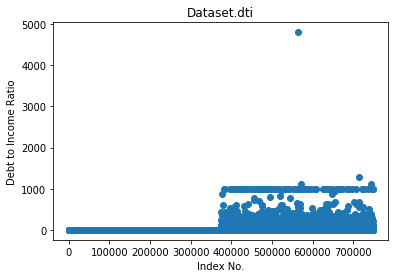

After removing outlier data for Debt to Income Ratio


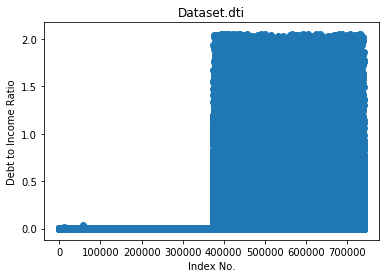

Before removing outlier data for Loan Amount


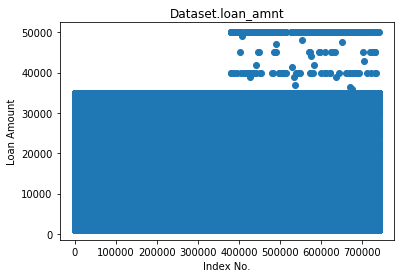

After removing outlier data for Loan Amount


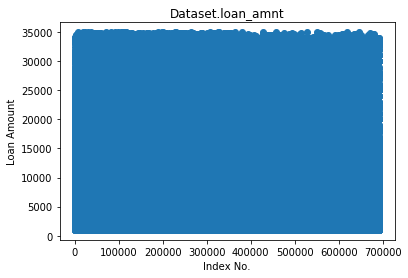

Scatterplot for employment length


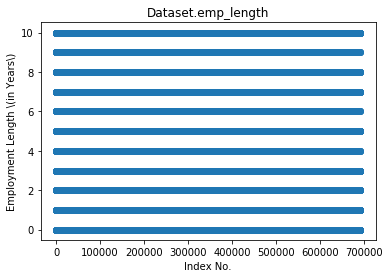

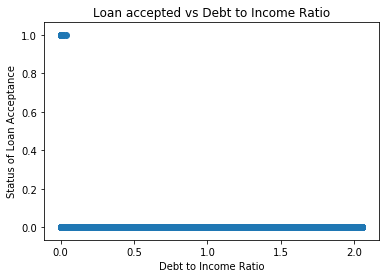

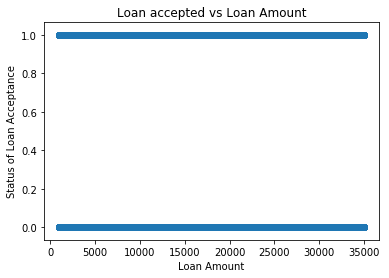

In [34]:
dataset = copy.deepcopy(temp_dataset)

%matplotlib inline
import matplotlib.pyplot as plt

# Removing outliers from dti column

print('Before removing outlier data for Debt to Income Ratio')

plt.scatter(range(len(dataset)),dataset.dti)
plt.title('Dataset.dti')
plt.xlabel('Index No.')
plt.ylabel('Debt to Income Ratio')
plt.show()


dataset = dataset[dataset.dti < dataset.dti.quantile(0.99)]

print('After removing outlier data for Debt to Income Ratio')
plt.scatter(range(len(dataset)),dataset.dti)
plt.title('Dataset.dti')
plt.xlabel('Index No.')
plt.ylabel('Debt to Income Ratio')
plt.show()



# Removing outliers from loan_amnt
print('Before removing outlier data for Loan Amount')

plt.scatter(range(len(dataset)),dataset.loan_amnt)
plt.title('Dataset.loan_amnt')
plt.xlabel('Index No.')
plt.ylabel('Loan Amount')
plt.show()

dataset = dataset[dataset.loan_amnt < dataset.loan_amnt.quantile(0.99)]

print('After removing outlier data for Loan Amount')

plt.scatter(range(len(dataset)),dataset.loan_amnt)
plt.title('Dataset.loan_amnt')
plt.xlabel('Index No.')
plt.ylabel('Loan Amount')
plt.show()

## other scater plots

print('Scatterplot for employment length')
plt.scatter(range(len(dataset)),dataset.emp_length)
plt.title('Dataset.emp_length')
plt.xlabel('Index No.')
plt.ylabel('Employment Length \(in Years\)')
plt.show()

plt.scatter(dataset.dti, dataset.loan_accepted)
plt.title('Loan accepted vs Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Status of Loan Acceptance')
plt.show()

plt.scatter(dataset.loan_amnt, dataset.loan_accepted)
plt.title('Loan accepted vs Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Status of Loan Acceptance')
plt.show()

In [11]:
no_outlier_data = copy.deepcopy(dataset)

In [12]:
print(min(dataset.dti), max(dataset.dti))

0.0 2.0565


In [35]:
# Performing One Hot Encoding using get_dummies
encoded_dataset = pd.get_dummies(dataset, columns=['title', 'state'])
encoded_dataset = encoded_dataset.reset_index()
encoded_dataset = encoded_dataset.drop('index', axis=1)

print(encoded_dataset.shape)
encoded_dataset.head()

(692357, 68)


,loan_amnt,dti,emp_length,loan_accepted,title_Business loan,title_Car financing,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,28000.0,0.002160,10.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12000.0,0.003195,3.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33600.0,0.001401,8.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11550.0,0.002107,5.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25000.0,0.002602,10.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
## Training a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr_model = LogisticRegression()

train_set = encoded_dataset.loc[:, encoded_dataset.columns != 'loan_accepted']
target = encoded_dataset['loan_accepted']


X_train, X_test, y_train, y_test = train_test_split(
    train_set,
    target,
    test_size=0.4,
    random_state=0
)

lr_model.fit(X_train,y_train)
print(lr_model.coef_)

[[ 1.01902050e-05 -6.23428099e-01  4.61886109e-01 -5.59061779e-02
  -9.75578720e-02  9.50001506e-02 -1.63487860e-01 -7.02719172e-03
  -2.55891059e-02 -1.36606091e-01 -5.48039525e-02  0.00000000e+00
  -7.77360331e-02 -8.10426693e-02 -2.90745947e-01  6.45002148e-06
   0.00000000e+00 -3.41968729e-02 -1.82749144e-03 -3.23903199e-02
  -1.65905375e-02 -1.31236093e-02 -7.39711214e-02 -9.68382058e-04
  -1.01538946e-02  1.04796518e-03 -4.72902699e-03 -8.08495338e-02
  -4.07884409e-02 -8.21343582e-03 -2.62437453e-02 -1.97536643e-02
  -8.07544442e-03 -1.85920791e-02 -2.20862780e-02 -1.13781909e-02
  -1.73207375e-02 -1.20330428e-03 -2.89529745e-02  3.46347037e-06
  -2.26698786e-02 -1.73160932e-02 -1.57888868e-03 -3.52578236e-02
  -3.46614100e-04 -2.66054290e-03 -2.97712318e-03 -1.98184378e-02
  -6.22141851e-03 -1.11479418e-02 -6.94941281e-02 -4.29231179e-02
  -1.33930947e-02 -5.22075142e-03 -3.97049288e-02 -3.99094772e-03
  -2.38072692e-02 -2.66349919e-03 -3.19396069e-02 -7.79189498e-02
  -3.75550

In [15]:
#Cross validating the model and evaluating the model
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import classification_report

print('Validation Scores for Logistic Regression are: ')
scores = cross_val_score(lr_model, X_train, y_train, cv=10)
print(scores)


y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
# precision = True Positive / Predictive Positive
# recall = True Positive/ Total Positive (TP = TP+N)

Validation Scores for Logistic Regression are: 
[0.84274126 0.83753791 0.83912667 0.84309477 0.84542982 0.83582485
 0.84357623 0.83750993 0.84278183 0.83426013]
             precision    recall  f1-score   support

          0       0.80      0.89      0.84    134950
          1       0.88      0.79      0.83    141993

avg / total       0.84      0.84      0.84    276943



In [16]:
rejected_data['loan_amnt'].describe()

count    374794.000000
mean      12457.790472
std       10316.560297
min        1000.000000
25%        5000.000000
50%       10000.000000
75%       20000.000000
max       50000.000000
Name: loan_amnt, dtype: float64

In [17]:
approved_data['loan_amnt'].describe()

count    421095.000000
mean      15240.285862
std        8571.325901
min        1000.000000
25%        8500.000000
50%       14000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [19]:
# Testing logistic regression model

print('Testing logistic regression model without feature scaling')
dti = 0.08
emp_length = 3

test_person = pd.DataFrame(data=None, columns=train_set.columns)
test_person.dti = [dti]
test_person.emp_length = [emp_length]
test_person['title_Debt consolidation'] = [1]
test_person['state_CA'] = [1]
test_person = test_person.fillna(0)

loan_amnt = 1000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(lr_model.predict_proba(test_person))


loan_amnt = 10000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(lr_model.predict_proba(test_person))


loan_amnt = 100000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(lr_model.predict_proba(test_person))

Predict with loan_amnt:1000, dti:0.08, emp_length:3
[[0.45541322 0.54458678]]
Predict with loan_amnt:10000, dti:0.08, emp_length:3
[[0.43277601 0.56722399]]
Predict with loan_amnt:100000, dti:0.08, emp_length:3
[[0.23367906 0.76632094]]


In [20]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pca = PCA(n_components = 5)
cls = LogisticRegression()

pipe = Pipeline([('pca', pca),('logistic', cls)])
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

scores = cross_val_score(pipe, X_train, y_train, cv=10)

print('Validation Scores for Combined Model are: ')
print(scores)
print(classification_report(y_test, predictions))

Validation Scores for Combined Model are: 
[0.82897239 0.83094218 0.83168841 0.83079367 0.83221396 0.82939746
 0.83024    0.83062517 0.82824198 0.82653282]
             precision    recall  f1-score   support

          0       0.79      0.89      0.84    134950
          1       0.88      0.77      0.82    141993

avg / total       0.84      0.83      0.83    276943



In [21]:
# Testing Combined Model pipeline
dti = 0.08
emp_length = 3

test_person = pd.DataFrame(data=None, columns=train_set.columns)
test_person.dti = [dti]
test_person.emp_length = [emp_length]
test_person.loan_amnt = [loan_amnt]
test_person['title_Debt consolidation'] = [1]
test_person['state_CA'] = [1]
test_person = test_person.fillna(0)

loan_amnt = 1000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(pipe.predict_proba(test_person))


loan_amnt = 10000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(pipe.predict_proba(test_person))


loan_amnt = 100000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(pipe.predict_proba(test_person))

Predict with loan_amnt:1000, dti:0.08, emp_length:3
[[0.4788173 0.5211827]]
Predict with loan_amnt:10000, dti:0.08, emp_length:3
[[0.40295009 0.59704991]]
Predict with loan_amnt:100000, dti:0.08, emp_length:3
[[0.02996644 0.97003356]]


In [22]:
# Modeling with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1, n_estimators = 100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Classification report for Random Forest')
print(classification_report(y_test, y_pred))

Classification report for Random Forest
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    134950
          1       1.00      1.00      1.00    141993

avg / total       1.00      1.00      1.00    276943



In [25]:
# Testing with Random Classifier

print('Testing with Random Classifier')
dti = 0.08
emp_length = 3

test_person = pd.DataFrame(data=None, columns=train_set.columns)
test_person.dti = [dti]
test_person.emp_length = [emp_length]
test_person.loan_amnt = [loan_amnt]
test_person['title_Debt consolidation'] = [1]
test_person['state_CA'] = [1]
test_person = test_person.fillna(0)

loan_amnt = 1000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(clf.predict_proba(test_person))


loan_amnt = 10000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(clf.predict_proba(test_person))


loan_amnt = 100000
test_person.loan_amnt = [loan_amnt]
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(clf.predict_proba(test_person))
print(clf.predict(test_person))

Testing with Random Classifier
Predict with loan_amnt:1000, dti:0.08, emp_length:3
[[0.94 0.06]]
Predict with loan_amnt:10000, dti:0.08, emp_length:3
[[1. 0.]]
Predict with loan_amnt:100000, dti:0.08, emp_length:3
[[1. 0.]]
[0]


In [0]:
## Feature Scaling from here

In [24]:
### Feature Scaling

from sklearn.preprocessing import MinMaxScaler

dataset = copy.deepcopy(no_outlier_data)
print(min(dataset.dti), max(dataset.dti))

def featureScaler(values):
    scaler = MinMaxScaler()
    if values.shape != (-1,1):
        data = np.array(values).reshape(-1,1)
    scaler.fit(data)
    scaled_values = scaler.transform(data)
    return scaler, scaled_values

emp_length_scaler, emp_length_scaled = featureScaler(dataset.emp_length)
dti_scaler, dti_scaled = featureScaler(dataset.dti)
loan_amnt_scaler, loan_amnt_scaled = featureScaler(dataset.loan_amnt)

dataset.emp_length = emp_length_scaled
dataset.dti = dti_scaled
dataset.loan_amnt = loan_amnt_scaled
dataset.head()

0.0 2.0565


,loan_amnt,title,dti,state,emp_length,loan_accepted
0,0.794702,Debt consolidation,0.001050,NC,1.0,1
1,0.323767,Credit card refinancing,0.001554,NJ,0.3,1
2,0.959529,Debt consolidation,0.000681,OH,0.8,1
3,0.310522,Credit card refinancing,0.001025,OH,0.5,1
4,0.706402,Debt consolidation,0.001265,VA,1.0,1


In [26]:
# Performing One Hot Encoding using get_dummies
encoded_dataset = pd.get_dummies(dataset, columns=['title', 'state'])
encoded_dataset = encoded_dataset.reset_index()
encoded_dataset = encoded_dataset.drop('index', axis=1)

print(encoded_dataset.shape)
encoded_dataset.head()

(692357, 68)


,loan_amnt,dti,emp_length,loan_accepted,title_Business loan,title_Car financing,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.794702,0.001050,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.323767,0.001554,0.3,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.959529,0.000681,0.8,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.310522,0.001025,0.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.706402,0.001265,1.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
## Training a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr_model_fs = LogisticRegression()

train_set = encoded_dataset.loc[:, encoded_dataset.columns != 'loan_accepted']
target = encoded_dataset['loan_accepted']


X_train, X_test, y_train, y_test = train_test_split(
    train_set,
    target,
    test_size=0.4,
    random_state=0
)

lr_model_fs.fit(X_train,y_train)
print(lr_model_fs.coef_)

[[ 2.34610606e+00 -1.29103283e+02  4.68116372e+00 -2.26218640e-01
  -3.76871969e-01  2.48158069e+00  1.84713361e+00 -2.76883975e-01
  -4.55052201e-01 -5.64796071e+00  4.61065421e-01  0.00000000e+00
   2.16480259e-01  6.08184667e-02  2.87768877e-01  1.20918980e-01
   0.00000000e+00  3.70052591e-01 -2.43482210e-01 -3.44199694e-01
  -2.22686851e-01  1.41958539e-01 -3.09938562e-02  3.48402088e-01
  -7.43810400e-02  3.72482600e-02 -2.54490078e-01 -5.98083786e-02
  -1.07337780e-01 -1.57958006e-01  2.57656353e-03 -8.89488333e-03
   3.29643778e-03 -1.37951328e-01 -1.39712849e-01 -1.93804589e-01
  -5.88854287e-02 -2.57660808e-02 -1.20971619e-01  2.35248688e-01
  -4.15541331e-02 -4.82040251e-01  2.20840836e-01 -2.08629832e-01
   5.01035467e-01  2.26202276e-01  2.14846029e-01 -5.09650331e-02
   9.21647664e-02  1.48370914e-01 -2.85999082e-01 -1.14322154e-02
   1.64157086e-01  4.48356996e-02 -3.69339288e-02 -1.53792434e-01
  -2.85211717e-01  1.60643586e-02 -2.35885079e-01  1.44485801e-01
   2.74834

In [29]:
#Cross validating the model and evaluating the model
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import classification_report

print('Validation Score for Logistic Regression with Feature Scaling')
scores = cross_val_score(lr_model_fs, X_train, y_train, cv=10)
print(scores)


y_pred = lr_model_fs.predict(X_test)
print(classification_report(y_test, y_pred))
# precision = True Positive / Predictive Positive
# recall = True Positive/ Total Positive (TP = TP+N)

Validation Score for Logistic Regression with Feature Scaling
[0.96926077 0.96969332 0.96986183 0.97200356 0.97053513 0.96974074
 0.96752606 0.96872969 0.96728533 0.96844082]
             precision    recall  f1-score   support

          0       0.98      0.95      0.97    134950
          1       0.96      0.98      0.97    141993

avg / total       0.97      0.97      0.97    276943



In [30]:
# Testing model with feature scaling

print('Testing Model with feature scaling')
dti = 0.08
emp_length = 3

test_person = pd.DataFrame(data=None, columns=train_set.columns)

test_person.dti = [dti]
test_person.dti = dti_scaler.transform(np.array(test_person.dti).reshape(-1,1))

test_person.emp_length = [emp_length]
test_person.emp_length = emp_length_scaler.transform(np.array(test_person.emp_length).reshape(-1,1))

test_person['title_Debt consolidation'] = [1]
test_person['state_CA'] = [1]
test_person = test_person.fillna(0)

loan_amnt = 1000
test_person.loan_amnt = loan_amnt_scaler.transform([[loan_amnt]])
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(lr_model_fs.predict_proba(test_person))


loan_amnt = 10000
test_person.loan_amnt = loan_amnt_scaler.transform([[loan_amnt]])
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(lr_model_fs.predict_proba(test_person))


loan_amnt = 100000
test_person.loan_amnt = loan_amnt_scaler.transform([[loan_amnt]])
print('Predict with loan_amnt:{0}, dti:{1}, emp_length:{2}'.format(loan_amnt, dti, emp_length))
print(lr_model_fs.predict_proba(test_person))

Testing Model with feature scaling
Predict with loan_amnt:1000, dti:0.08, emp_length:3
[[0.94973779 0.05026221]]
Predict with loan_amnt:10000, dti:0.08, emp_length:3
[[0.91031175 0.08968825]]
Predict with loan_amnt:100000, dti:0.08, emp_length:3
[[0.01989087 0.98010913]]


In [37]:
# using utility function to calculate the maximum loan
def utility_function(prob, interest = 0.1, exp_utility = 2000, num_months = 6):
    '''
        prob = probability of returning money
        loan_amnt = Amount loaned
        exp_utility = Minimum expected utility that Lending Club wants
        num_months = lending period
        Expected Utility = prob * loan_amnt * (1 + interest)^num_months - loan_amnt*(1 - prob) 
    '''
    max_loan = float(exp_utility) / (prob * (1 + interest)**num_months -  (1 - prob))
    return max_loan

  
loan_amnt = 10000
dti = 0.23
emp_length = 5

test_person = pd.DataFrame(data=None, columns=train_set.columns)

test_person.dti = [dti]
test_person.emp_length = [emp_length]
test_person.loan_amnt = [loan_amnt]

# test_person.dti = dti_scaler.transform(np.array(test_person.dti).reshape(-1,1))
# test_person.emp_length = emp_length_scaler.transform(np.array(test_person.emp_length).reshape(-1,1))
# test_person.loan_amnt = loan_amnt_scaler.transform(np.array(test_person.loan_amnt).reshape(-1,1))

test_person['title_Business loan'] = [1]
test_person['state_CA'] = [1]
test_person = test_person.fillna(0)


proba = lr_model.predict_proba(test_person)
print('Probabilty of the person returning money::', proba[0][1])
print('Maximum Loan:: ', utility_function(proba[0][1]))

Probabilty of the person returning money:: 0.7700110605144317
Maximum Loan::  1763.4621878488026


In [1]:
# actual function to calculate maximum loan

def calc_max_loan(model, data, loan_amnt=1, max_loan_amnt=10000, feature_scaling=False, scaler = None):
    '''
        model: The classification model that is being used to get classify whether the application gets approved or not
        data: Data frame with single row of data about information of a certain person
        loan_amnt: Minimum loan amount that Lending Club gives out
        max_loan_amnt: Maximum loan provided by Lending Club
        feature_scaling: 
            Is feature scaling used in while building model for loan amount?
            If using feature scaling then all the values in 'data' that have been feature scaled in the model
            should be feature scaled.
        scaler: the MaxMinScaler that was used to perform feature scaling for loan amount.
    '''
  
    while True:
        loan_amnt += 1

        data.loan_amnt = [loan_amnt]
        if feature_scaling:
            data.loan_amnt = scaler.transform(np.array(person_info.loan_amnt).reshape(-1,1))

        loan_status = model.predict(data.loc[:, data.columns != 'loan_accepted'])
        if loan_status == 0:
            if feature_scaling:
                print('Maximum Loan Amount::', scaler.inverse_transform(scaled_loan_amnt))
            else:
                print('Maximum Loan Amount::', [loan_amnt])
            break

        if loan_amnt >= max_loan_amnt:
            print('Maximum Loan::', loan_amnt)
            break
      